**Project: Extreme Temperature Analysis**

Moving from Context to Data

In [2]:
import pandas as pd
file_path = "/Users/mohammadrezanilchiyan/Desktop/UE/Datascientest/project/Temperature/Data/processed_2025.12.15/Marseille_daily_TX_raw.csv"
df_mar = pd.read_csv(file_path, sep=",")

In [3]:
print(df_mar.head()) 

         date  NUM_POSTE        NOM_USUEL    TX    TN      LAT     LON  ALTI
0  1955-07-01   13001009  AIX EN PROVENCE  28.0  11.7  43.5295  5.4245   173
1  1955-07-02   13001009  AIX EN PROVENCE  29.0  13.0  43.5295  5.4245   173
2  1955-07-03   13001009  AIX EN PROVENCE  28.9  19.7  43.5295  5.4245   173
3  1955-07-04   13001009  AIX EN PROVENCE  29.8  16.0  43.5295  5.4245   173
4  1955-07-05   13001009  AIX EN PROVENCE  24.1  17.4  43.5295  5.4245   173


In [4]:
df_mar.head(10)

,date,NUM_POSTE,NOM_USUEL,TX,TN,LAT,LON,ALTI
0,1955-07-01,13001009,AIX EN PROVENCE,28.0,11.7,43.5295,5.4245,173
1,1955-07-02,13001009,AIX EN PROVENCE,29.0,13.0,43.5295,5.4245,173
2,1955-07-03,13001009,AIX EN PROVENCE,28.9,19.7,43.5295,5.4245,173
3,1955-07-04,13001009,AIX EN PROVENCE,29.8,16.0,43.5295,5.4245,173
4,1955-07-05,13001009,AIX EN PROVENCE,24.1,17.4,43.5295,5.4245,173
5,1955-07-06,13001009,AIX EN PROVENCE,19.1,9.3,43.5295,5.4245,173
6,1955-07-07,13001009,AIX EN PROVENCE,25.8,9.9,43.5295,5.4245,173
7,1955-07-08,13001009,AIX EN PROVENCE,25.1,9.7,43.5295,5.4245,173
8,1955-07-09,13001009,AIX EN PROVENCE,28.1,10.9,43.5295,5.4245,173
9,1955-07-10,13001009,AIX EN PROVENCE,28.0,12.3,43.5295,5.4245,173


Quick check of the data

In [5]:
df_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133133 entries, 0 to 133132
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       133133 non-null  object 
 1   NUM_POSTE  133133 non-null  int64  
 2   NOM_USUEL  133133 non-null  object 
 3   TX         129101 non-null  float64
 4   TN         129101 non-null  float64
 5   LAT        133133 non-null  float64
 6   LON        133133 non-null  float64
 7   ALTI       133133 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.1+ MB


In [6]:
# On display the dataframe's dimensions
print('Dimension database :', df_mar.shape, '\n')


Dimension database : (133133, 8) 



In [7]:
df_mar.describe(include = "all")

,date,NUM_POSTE,NOM_USUEL,TX,TN,LAT,LON,ALTI
count,133133,1.331330e+05,133133,129101.00000,129101.000000,133133.000000,133133.000000,133133.000000
unique,27028,NaN,5,NaN,NaN,NaN,NaN,NaN
top,1955-07-01,NaN,BEC DE L AIGLE,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,27028,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.304729e+07,NaN,19.48006,9.728836,43.454351,5.247403,114.937701
std,NaN,3.342692e+04,NaN,7.37841,6.558264,0.151806,0.229114,116.160791
min,NaN,1.300101e+07,NaN,-11.60000,-20.200000,43.174667,4.927500,9.000000
25%,NaN,1.302800e+07,NaN,13.70000,4.900000,43.437667,5.108000,23.000000
50%,NaN,1.304700e+07,NaN,19.00000,9.800000,43.522667,5.216000,58.000000
75%,NaN,1.305400e+07,NaN,25.40000,15.000000,43.529500,5.424500,173.000000


In [8]:
df_mar.isna().sum()

date            0
NUM_POSTE       0
NOM_USUEL       0
TX           4032
TN           4032
LAT             0
LON             0
ALTI            0
dtype: int64

In [9]:
df_mar["date"] = pd.to_datetime(df_mar["date"], format="%Y-%m-%d", errors="coerce")


In [10]:
df_mar["date"].dtypes

dtype('<M8[ns]')

In [11]:
print('the Min date is:',df_mar["date"].min(), 'the Max date is:',df_mar["date"].max())

the Min date is: 1950-01-01 00:00:00 the Max date is: 2023-12-31 00:00:00


In [12]:
df_mar["NUM_POSTE"].nunique()


5

In [13]:
df_mar["NOM_USUEL"].unique()

array(['AIX EN PROVENCE', 'BEC DE L AIGLE', 'ISTRES', 'MARIGNANE',
       'SALON DE PROVENCE'], dtype=object)

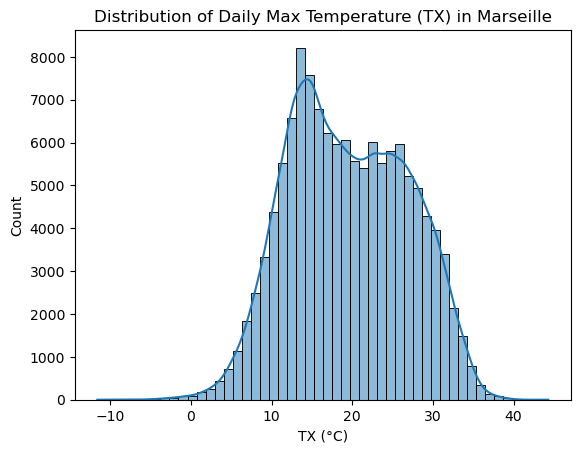

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df_mar["TX"], bins=50, kde=True)
plt.title("Distribution of Daily Max Temperature (TX) in Marseille")
plt.xlabel("TX (°C)")
plt.show()

Each bar shows how many data points fall into that interval.

Y-axis (Count), Shows how many days fall into each temperature range (each bin).

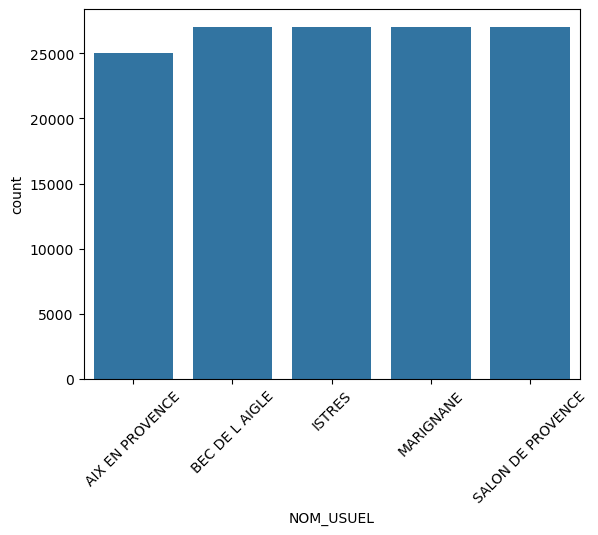

In [15]:
df_mar["NOM_USUEL"].value_counts()
sns.countplot(x="NOM_USUEL", data=df_mar)
plt.xticks(rotation=45)
plt.show()

Most stations have ~27,000 daily observations.

How latitude (LAT), longitude (LON), and altitude (ALTI) affect daily maximum temperature (TX).

TX vs ALTI: see if temperature decreases with altitude (often true).

TX vs LAT/LON: see if there’s a geographical pattern.

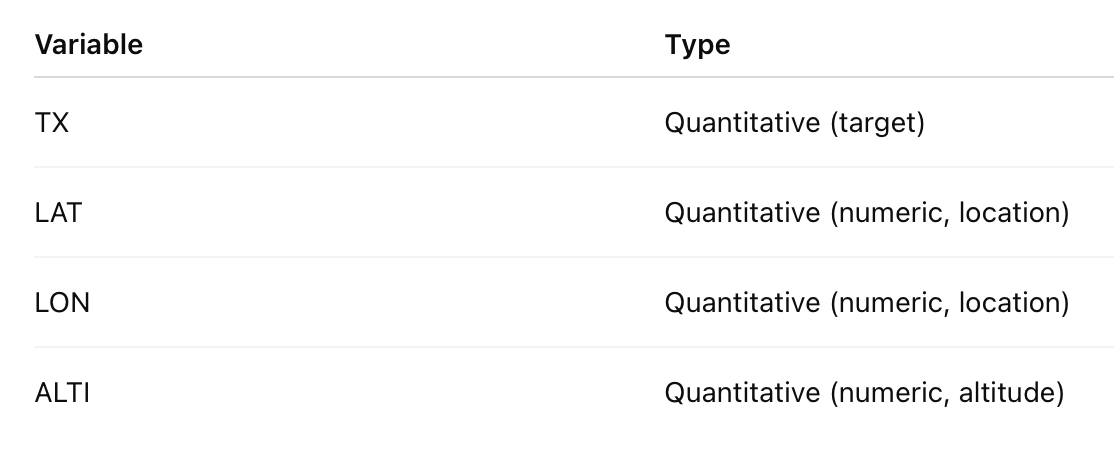

In [16]:
from IPython.display import Image, display
display(Image(filename="variables.png",width=500))

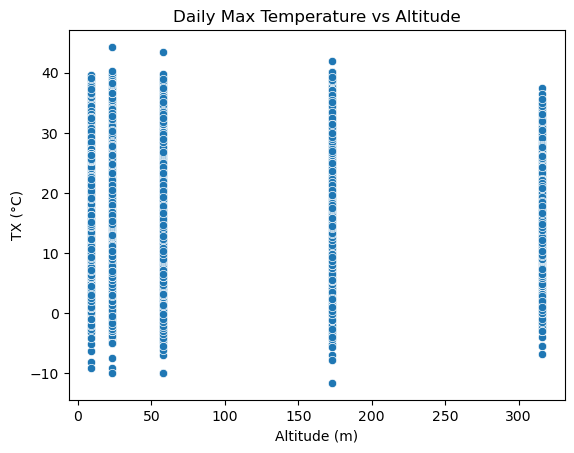

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="ALTI", y="TX", data=df_mar)
plt.title("Daily Max Temperature vs Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("TX (°C)")
plt.show()

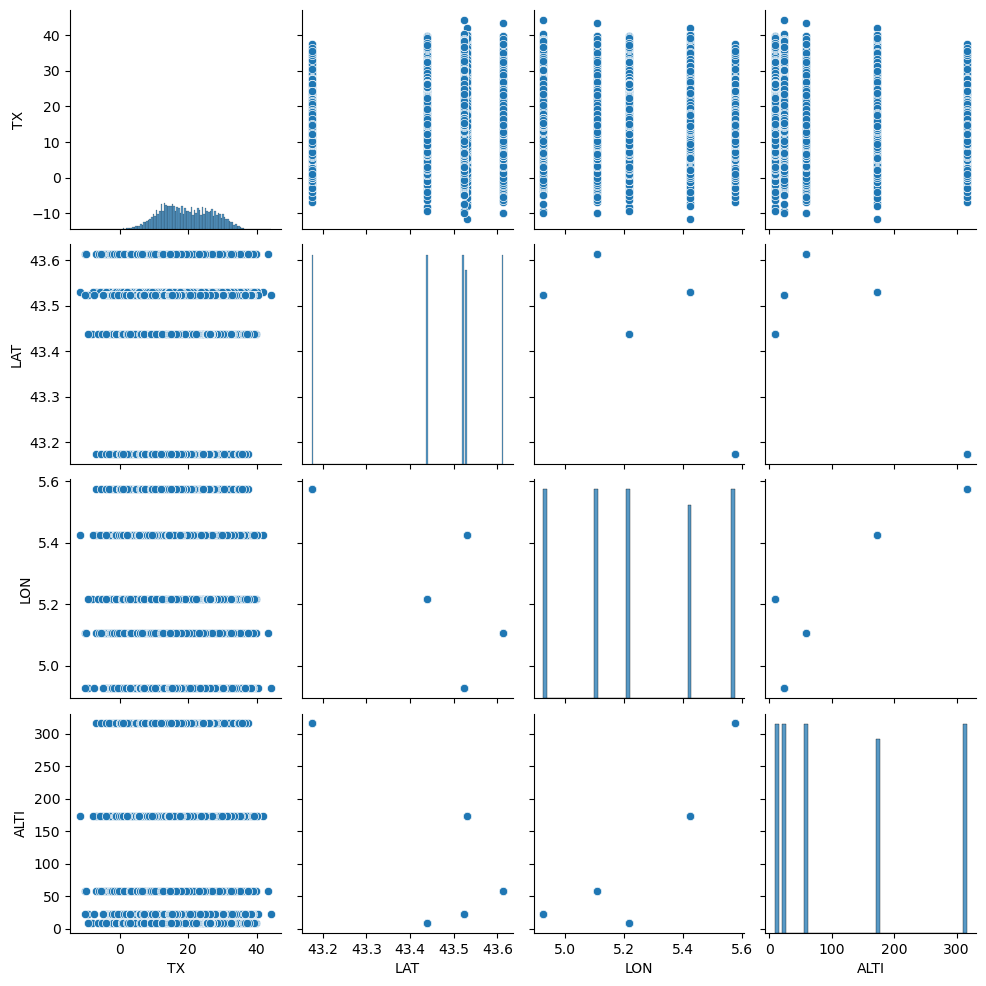

In [18]:
sns.pairplot(df_mar, vars=["TX","LAT","LON","ALTI"])
plt.show()

# Correlation heatmap
- Values close to 1 or -1 → strong relationship.
- Values near 0 → weak or no linear relationship.

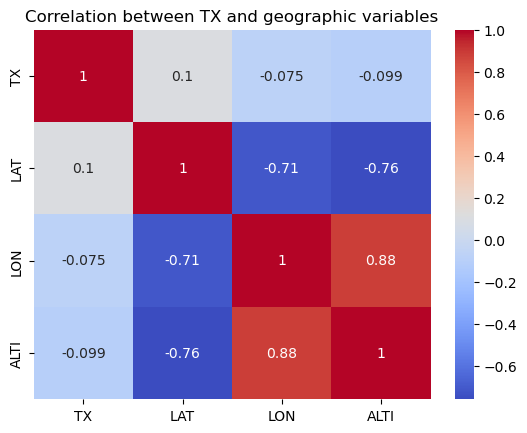

In [19]:
corr = df_mar[["TX","LAT","LON","ALTI"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between TX and geographic variables")
plt.show()

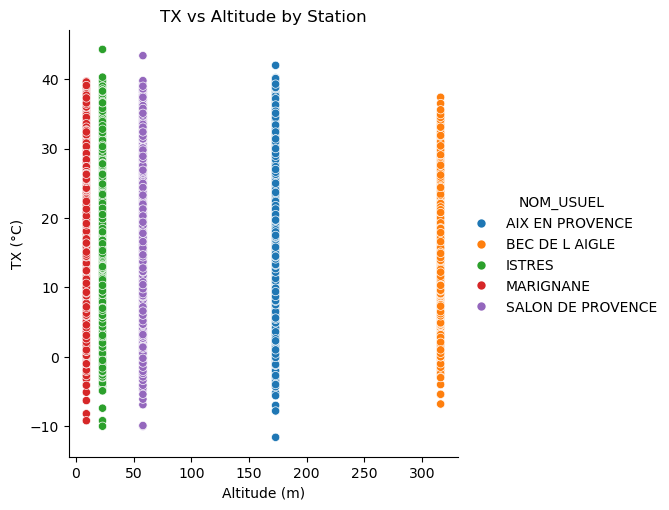

In [20]:
sns.relplot(
    data=df_mar,
    x="ALTI",
    y="TX",
    hue="NOM_USUEL",   # color by station
    kind="scatter"
)

plt.title("TX vs Altitude by Station")
plt.xlabel("Altitude (m)")
plt.ylabel("TX (°C)")
plt.show()

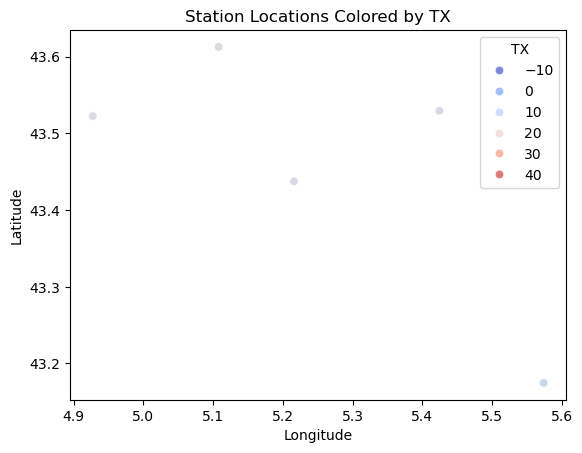

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_mar, x="LON", y="LAT", hue="TX", palette="coolwarm", alpha=0.7)

plt.title("Station Locations Colored by TX")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

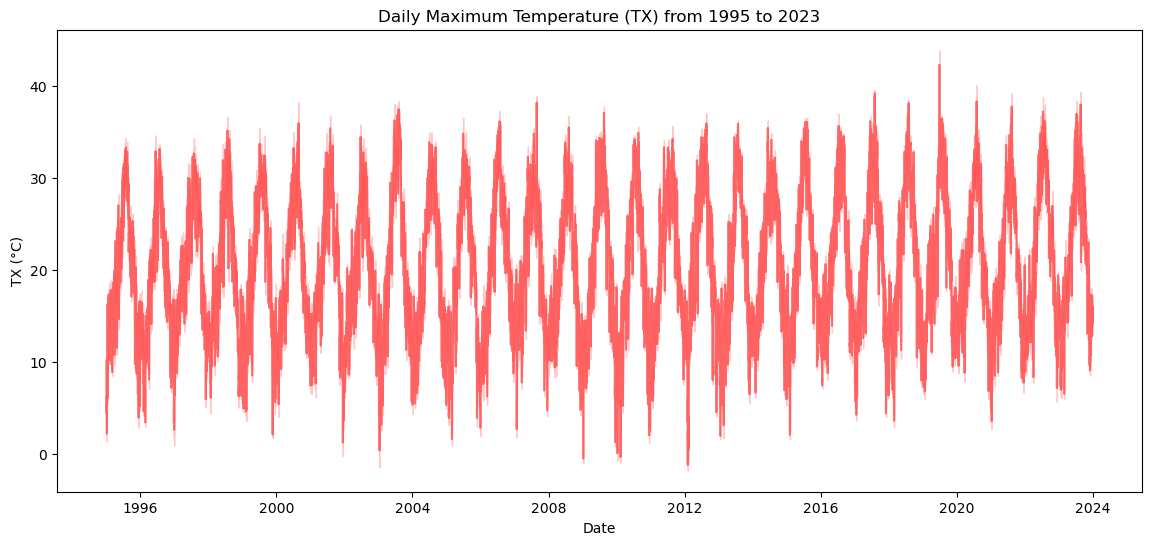

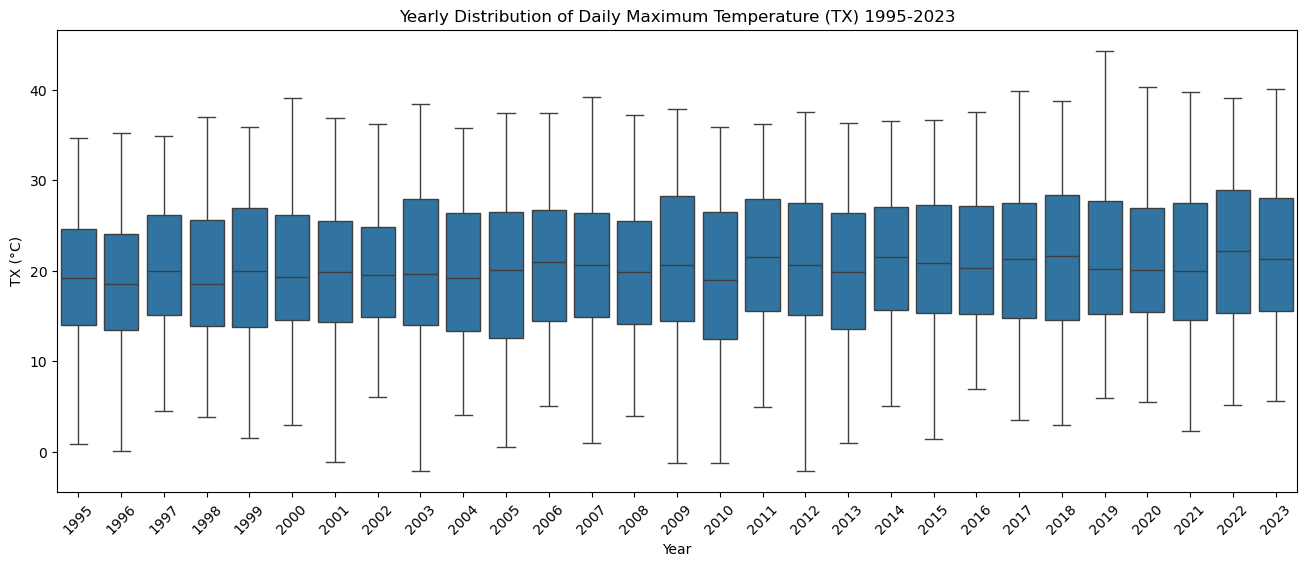

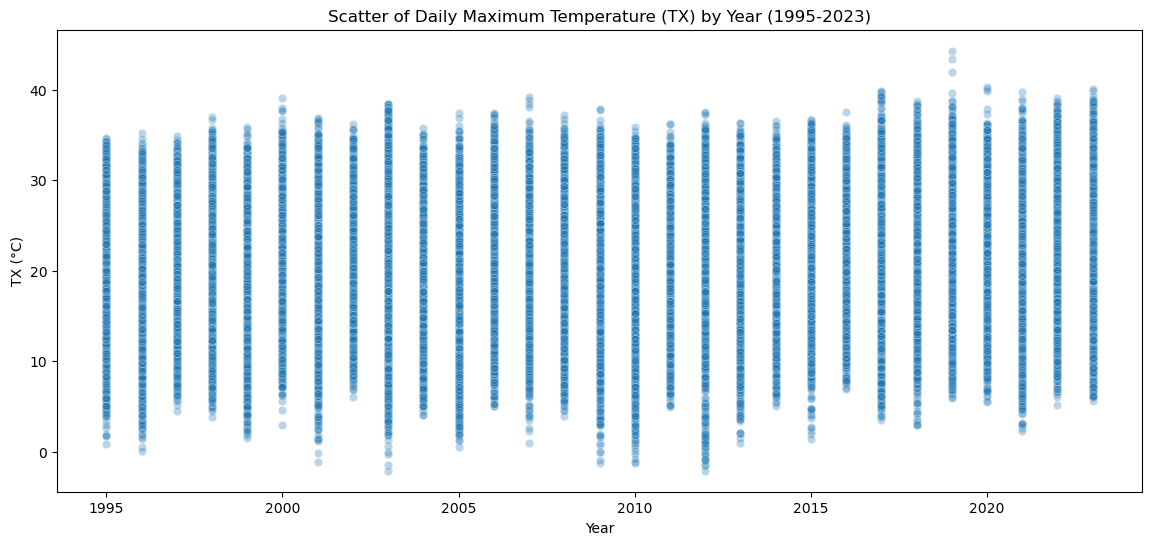

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1- Ensure 'date' is datetime
df_mar["date"] = pd.to_datetime(df_mar["date"], errors="coerce")

#2- Drop rows with missing TX or date
df_year = df_mar.dropna(subset=["date", "TX"]).copy()

#3- Filter years 1995-2023
df_year = df_year[(df_year["date"].dt.year >= 1995) & (df_year["date"].dt.year <= 2023)].copy()

#4-  Create 'year' column
df_year["year"] = df_year["date"].dt.year

#5-  Plot 1: Daily TX line over time
plt.figure(figsize=(14,6))
sns.lineplot(x="date", y="TX", data=df_year, color="red", alpha=0.5)
plt.title("Daily Maximum Temperature (TX) from 1995 to 2023")
plt.xlabel("Date")
plt.ylabel("TX (°C)")
plt.show()

#6- Plot 2: Yearly TX distribution (boxplot)
plt.figure(figsize=(16,6))
sns.boxplot(x="year", y="TX", data=df_year)
plt.xticks(rotation=45)
plt.title("Yearly Distribution of Daily Maximum Temperature (TX) 1995-2023")
plt.xlabel("Year")
plt.ylabel("TX (°C)")
plt.show()

#7- Plot 3: Scatter plot of TX vs year
plt.figure(figsize=(14,6))
sns.scatterplot(x="year", y="TX", data=df_year, alpha=0.3)
plt.title("Scatter of Daily Maximum Temperature (TX) by Year (1995-2023)")
plt.xlabel("Year")
plt.ylabel("TX (°C)")
plt.show()


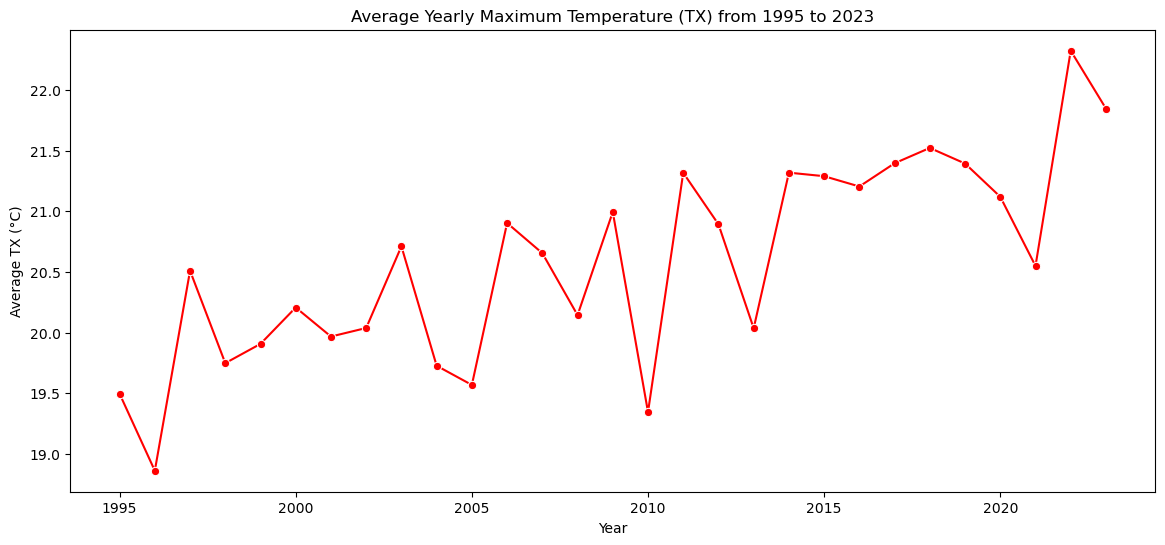

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: yearly average TX
df_yearly = df_year.groupby("year")["TX"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(x="year", y="TX", data=df_yearly, marker="o", color="red")

plt.title("Average Yearly Maximum Temperature (TX) from 1995 to 2023")
plt.xlabel("Year")
plt.ylabel("Average TX (°C)")
plt.show()

- During 1995–2005, average yearly maximum temperatures in Marseille mostly ranged between 19.5°C and 20.5°C.
- From 2015 to 2023, values frequently exceeded 21°C, with several years reaching or surpassing 22°C.
- Despite year-to-year variability, the overall trend shows a clear and accelerating warming, especially after 2010.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime
df_mar["date"] = pd.to_datetime(df_mar["date"], errors="coerce")

# Extract month
df_mar["month"] = df_mar["date"].dt.month

# Monthly mean TX per station
monthly_tx = (
    df_mar
    .groupby(["month", "NOM_USUEL"])["TX"]
    .mean()
    .unstack()
)


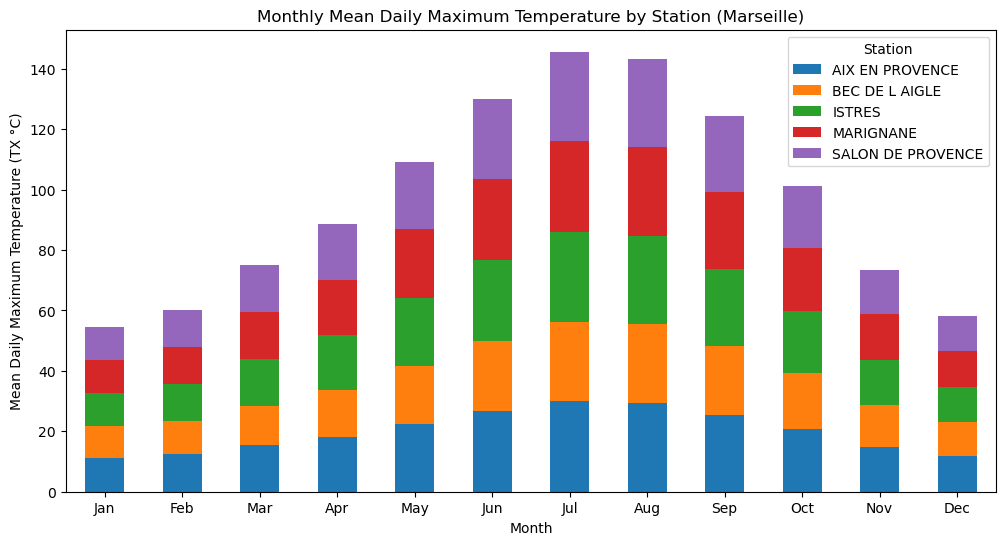

In [25]:
monthly_tx.plot.bar(
    stacked=True,
    figsize=(12,6)
)

plt.xticks(
    range(12),
    ["Jan","Feb","Mar","Apr","May","Jun",
     "Jul","Aug","Sep","Oct","Nov","Dec"],
    rotation=0
)

plt.xlabel("Month")
plt.ylabel("Mean Daily Maximum Temperature (TX °C)")
plt.title("Monthly Mean Daily Maximum Temperature by Station (Marseille)")
plt.legend(title="Station")
plt.show()